In [2]:
import os
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')

In [3]:
BASE_DIR = os.path.dirname(os.getcwd())
CURR_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '01 Data Processing\Datasets')
IMPORT_DIR = os.path.join(CURR_DIR, 'ImportFiles')

In [4]:
# Load data
filenames = ['btc_articles.csv', 'eth_articles.csv', 'xrp_articles.csv','ada_articles.csv','bnb_articles.csv']
dfs ={}
for filename in filenames:
    filepath = os.path.join(DATA_DIR, filename)
    dfs[filename] = pd.read_csv(filepath)

In [5]:
btc_articles = dfs['btc_articles.csv']
xrp_articles = dfs['xrp_articles.csv']
eth_articles = dfs['eth_articles.csv']
ada_articles = dfs['ada_articles.csv']
bnb_articles = dfs['bnb_articles.csv']

# Quick EDA
- References:
    - https://youtube.com/playlist?list=PLgNJO2hghbmh5EcfhbsJh_W29WinwlsHD

In [5]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [6]:
def summary(df, col):
    df['word_count'] =  df[col].apply(lambda x: len(x.split()))
    df['char_count'] = df[col].apply(lambda x : len(x))
    def average_word(x):
        words = x.split()
        return sum(len(word) for word in words) / len(words)
    df['average_word_length'] = df[col].apply(lambda x: average_word(x))
    df['stopword_count'] = df[col].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words])) 
    df['stopword_rate'] = df.stopword_count / df.word_count
    return df

In [7]:
def plot_countplot(df, feature):
    ax = df[feature].value_counts().sort_index().plot(kind='bar')
    return ax

### Bitcoin

In [8]:
btc_articles = summary(btc_articles, 'text')
mask = btc_articles[btc_articles.text.str.contains('var researchConfig')].index
btc_articles = btc_articles.drop(mask, axis=0)
btc_articles.sort_values(by='stopword_count').head()

coin     section                                              title  \
292    bitcoin     Markets  Bitcoin-accepting Atlantis takes on the Silk Road   
4228   bitcoin    Features  How the Crypto Community is Celebrating Bitcoi...   
21645  bitcoin  No Section  Bitcoin (BTC) Miners Leaving China, Is the Pri...   
15066  bitcoin     Reports  Arcane Research: Off-chain Scaling Solutions f...   
8035   bitcoin     Markets  Fidelity Charitable Raises $22 Million in Bitc...   

                                                    text  \
292                                  Read the full story   
4228   Pizza image  via Shutterstock. [ View the stor...   
21645  Here’s why Bitcoin miners’ exodus from China m...   
15066  Arcane Research provides a quick overview of t...   
8035   Editor's Note:  This story has been removed du...   

                                                     url    source  \
292    https://www.coindesk.com/markets/2013/06/27/bi...  coindesk   
4228   https://www.coindesk.com/markets/2015/05/22/ho...  coindesk   
21645  https://u.today/bitcoin-btc-miners-leaving-chi...    utoday   
15066  https://www.coindesk.com/reports/arcane-resear...  coindesk   
8035   https://www.coindesk.com/markets/2017/12/18/fi...  coindesk   

             date      time language  word_count  char_count  \
292    2013-06-27  19:00:00       en           4          19   
4228   2015-05-22  17:09:00       en          17          96   
21645  2021-05-26  12:53:00       en          15          88   
15066  2020-07-23  09:22:00       en          18         135   
8035   2017-12-18  11:45:00       en          13          88   

       average_word_length  stopword_count  stopword_rate  
292               4.000000               1       0.250000  
4228              4.647059               3       0.176471  
21645             4.933333               3       0.200000  
15066             6.555556               5       0.277778  
8035              5.692308               5       0.384615

In [9]:
btc_articles.iloc[33727].text

'Mike Novogratz\'s cryptocurrency-focused, financial-services firm Galaxy Digital has won an auction to  buy self-custody platform GK8 from embattled crypto lender Celsius Network , Galaxy said in a press release Friday. This article originally appeared in  Crypto Markets Today , CoinDesk’s daily newsletter diving into what happened in today\'s crypto markets.  Subscribe to get it in your inbox every day . Celsius had put a few of its assets up for sale  after  filing for bankruptcy   in July following a downturn in the crypto market. Terms of the deal weren\'t disclosed , but Galaxy spokesman Michael Wursthorn said the price was materially less than what Celsius had paid a year ago. Celsius had acquired GK8 in November 2021 for $115 million, as  reported . Galaxy\'s aim with the acquisition  is to expand its prime brokerage offering. Around 40 people would be joining Galaxy\'s team, including blockchain engineers and cryptographers. Expand Galaxy\'s global footprint  with a new office

In [10]:
btc_articles.describe()

word_count    char_count  average_word_length  stopword_count  \
count  34183.000000  34183.000000         34183.000000    34183.000000   
mean     608.891847   3795.731797             5.233889      231.947664   
std      503.961112   3086.793887             0.272950      208.375909   
min        4.000000     19.000000             3.772727        1.000000   
25%      288.000000   1810.000000             5.065097      104.000000   
50%      436.000000   2723.000000             5.224551      160.000000   
75%      780.500000   4860.500000             5.391684      291.000000   
max    11634.000000  62568.000000            18.947846     5739.000000   

       stopword_rate  
count   34183.000000  
mean        0.371209  
std         0.039909  
min         0.092126  
25%         0.344828  
50%         0.372125  
75%         0.398693  
max         0.534884

### XRP/Ripple

In [11]:
xrp_articles = summary(xrp_articles, 'text')
xrp_articles.sort_values(by='stopword_rate').head()

coin       section                                              title  \
2676     xrp         News    Institutional XRP inflows surge as AUM nearly...   
1770     xrp         News    Crypto Traders Are Longing ETH (And Not Much ...   
872      xrp   Local News    Swiss Stock Exchange SIX to Reportedly List X...   
1792  ripple    No Section  Ripple’s EUR ODL Corridor Wires 143 Mln XRP, R...   
1556     xrp         News    Mastercard, Binance X and Ripple's Xpring Joi...   

                                                   text  \
2676  Institutional investors have rallied around  X...   
1770  The number of Ethereum ( ETH ) longs has  cont...   
872   Switzerland’s  largest  stock  exchange SIX wi...   
1792  The XRPL Monitor bot has noticed several garga...   
1556  The Blockchain Education Alliance launched by ...   

                                                    url         source  \
2676  https://cointelegraph.com/news/institutional-x...  cointelegraph   
1770  https://cointelegraph.com/news/crypto-traders-...  cointelegraph   
872   https://cointelegraph.com/news/swiss-stock-exc...  cointelegraph   
1792  https://u.today/ripples-eur-odl-corridor-wires...         utoday   
1556  https://cointelegraph.com/news/mastercard-bina...  cointelegraph   

            date      time language  word_count  char_count  \
2676  2021-04-21  00:00:00       en         282        1817   
1770  2020-05-17  00:00:00       en         389        2441   
872   2019-03-11  00:00:00       en         333        2098   
1792  2020-05-28  10:15:00       en         266        1940   
1556  2020-02-11  00:00:00       en         271        1921   

      average_word_length  stopword_count  stopword_rate  
2676             5.418440              65       0.230496  
1770             5.246787              94       0.241645  
872              5.219219              87       0.261261  
1792             6.195489              70       0.263158  
1556             6.044280              72       0.265683

In [12]:
xrp_articles.describe()

word_count    char_count  average_word_length  stopword_count  \
count  3990.00000   3990.000000          3990.000000     3990.000000   
mean    496.17995   3014.550125             5.134505      200.197744   
std     433.71901   2529.515860             0.304361      199.482129   
min      21.00000    118.000000             4.318471        9.000000   
25%     255.00000   1600.250000             4.916102       94.000000   
50%     327.00000   2047.000000             5.132149      123.000000   
75%     477.00000   2937.000000             5.336128      177.000000   
max    2994.00000  18749.000000             6.409302     1377.000000   

       stopword_rate  
count    3990.000000  
mean        0.382163  
std         0.046329  
min         0.230496  
25%         0.348267  
50%         0.377552  
75%         0.412664  
max         0.495286

### Ethereum

In [13]:
eth_articles = summary(eth_articles, 'text')
mask = eth_articles[eth_articles.text.str.contains('var researchConfig')].index
eth_articles = eth_articles.drop(mask, axis=0)
eth_articles.sort_values(by='stopword_rate').head(5)

coin     section                                              title  \
1764  ethereum     Reports      Arcane Research: Weekly Update, August 3 2020   
1857  ethereum     Reports       DappRadar: Dapp Ecosystem Report August 2020   
2245  ethereum     Reports       DappRadar: Dapp Industry Report January 2021   
2237  ethereum     Markets  AWS Marketplace Is Selling Origin's Decentrali...   
2665  ethereum  No Section  Bank of England Governor Says Cryptocurrencies...   

                                                   text  \
1764  Arcane Research shares its latest weekly repor...   
1857  DappRadar covers the evolution of seven blockc...   
2245  DappRadar’s latest report looks at the evoluti...   
2237  Amazon's AWS Marketplace began offering Origin...   
2665  BoE Governor Andrew Bailey called cryptocurren...   

                                                    url    source        date  \
1764  https://www.coindesk.com/reports/arcane-resear...  coindesk  2020-08-05   
1857  https://www.coindesk.com/reports/dappradar-dap...  coindesk  2020-09-10   
2245  https://www.coindesk.com/reports/dappradar-dap...  coindesk  2021-02-11   
2237  https://www.coindesk.com/markets/2021/02/09/aw...  coindesk  2021-02-09   
2665  https://u.today/bank-of-england-governor-says-...    utoday  2021-05-24   

          time language  word_count  char_count  average_word_length  \
1764  15:32:00       en          17         136             7.058824   
1857  16:13:00       en          30         202             5.766667   
2245  20:11:00       en          21         166             6.952381   
2237  21:21:00       en          85         579             5.741176   
2665  17:23:00       en          40         306             6.625000   

      stopword_count  stopword_rate  
1764               2       0.117647  
1857               5       0.166667  
2245               4       0.190476  
2237              18       0.211765  
2665               9       0.225000

In [14]:
eth_articles.describe()

word_count    char_count  average_word_length  stopword_count  \
count  5128.000000   5128.000000          5128.000000     5128.000000   
mean    492.520866   3076.646061             5.276090      189.140211   
std     400.063460   2434.909922             0.282145      165.998913   
min      17.000000    107.000000             4.204494        2.000000   
25%     256.000000   1619.750000             5.085169       93.000000   
50%     349.000000   2209.000000             5.261019      129.000000   
75%     591.250000   3684.500000             5.450302      223.000000   
max    4532.000000  27697.000000             7.058824     1796.000000   

       stopword_rate  
count    5128.000000  
mean        0.373645  
std         0.037492  
min         0.117647  
25%         0.348837  
50%         0.374446  
75%         0.398649  
max         0.514286

### ADA

In [15]:
ada_articles = summary(ada_articles, 'text')
ada_articles.sort_values(by='stopword_rate').head(5)

coin     section                                              title  \
1601  cardano  No Section  Cardano Among Top Three Chains with Highest Da...   
1183  cardano  No Section  Cardano, Dogecoin, Shiba Inu Post Gains Amid I...   
1466  cardano  No Section  Cardano Records 280% Spike in NFT Volumes With...   
146   cardano       News    Developer Activity Surrounding Eos, Tron, and...   
145   cardano       News    Cardano’s IOHK and Global Blockchain Business...   

                                                   text  \
1601  According to  GitHub  data, Cardano ranks amon...   
1183  Cryptocurrencies  traded  higher following the...   
1466  Cardano  has seen a 280% increase in its NFT v...   
146   A report published by  blockchain  and  AI  in...   
145   Eight new members have joined  Hyperledger , i...   

                                                    url         source  \
1601  https://u.today/cardano-among-top-three-chains...         utoday   
1183  https://u.today/cardano-dogecoin-shiba-inu-pos...         utoday   
1466  https://u.today/cardano-records-280-spike-in-n...         utoday   
146   https://cointelegraph.com/news/developer-activ...  cointelegraph   
145   https://cointelegraph.com/news/cardanos-iohk-a...  cointelegraph   

            date      time language  word_count  char_count  \
1601  2022-11-29  11:35:00       en         347        2277   
1183  2022-07-28  15:04:00       en         360        2473   
1466  2022-10-20  16:09:00       en         336        2150   
146   2020-06-14  00:00:00       en         361        2125   
145   2020-06-12  00:00:00       en         344        2501   

      average_word_length  stopword_count  stopword_rate  
1601             5.469741              85       0.244957  
1183             5.711111              89       0.247222  
1466             5.223214              86       0.255952  
146              4.869806              93       0.257618  
145              6.244186              92       0.267442

In [16]:
ada_articles.describe()

word_count    char_count  average_word_length  stopword_count  \
count  1661.000000   1661.000000          1661.000000     1661.000000   
mean    363.620108   2281.258880             5.265787      140.034919   
std     268.171997   1636.813206             0.281326      115.384992   
min      42.000000    282.000000             4.487685       13.000000   
25%     249.000000   1558.000000             5.062323       91.000000   
50%     309.000000   1956.000000             5.252525      117.000000   
75%     388.000000   2439.000000             5.442130      148.000000   
max    2813.000000  16270.000000             6.260417     1353.000000   

       stopword_rate  
count    1661.000000  
mean        0.379412  
std         0.039761  
min         0.244957  
25%         0.352445  
50%         0.378049  
75%         0.406475  
max         0.498054

### BNB

In [17]:
bnb_articles = summary(bnb_articles, 'text')
bnb_articles.sort_values(by='stopword_rate').head(5)

coin          section  \
37   binance   Market Update    
266  binance          Markets   
132  binance    Markets News    
279  binance   Altcoin Watch    
74   binance          Markets   

                                                 title  \
37    Bitcoin Nears $12K as Key Metric Flashes Buy ...   
266  Voyager Token Surges on Report Binance to Offe...   
132   Binance Coin hits all-time highs as BNB surpa...   
279   3 reasons why BNB price risks another 30% dec...   
74   Binance US Now Offers Staking Rewards for Thes...   

                                                  text  \
37   Bitcoin ( BTC ) price was heading back towards...   
266  Voyager Digital's native coin, voyager ( VGX )...   
132  Binance Coin ( BNB ), the in-house token of cr...   
279  BNB ( BNB ), the native token of the Binance c...   
74   Binance US has joined other major exchanges in...   

                                                   url         source  \
37   https://cointelegraph.com/news/bitcoin-nears-1...  cointelegraph   
266  https://www.coindesk.com/markets/2022/11/17/vo...       coindesk   
132  https://cointelegraph.com/news/binance-coin-hi...  cointelegraph   
279  https://cointelegraph.com/news/3-reasons-why-b...  cointelegraph   
74   https://www.coindesk.com/markets/2020/01/29/bi...       coindesk   

           date      time language  word_count  char_count  \
37   2019-08-08  00:00:00       en         417        2623   
266  2022-11-17  09:10:00       en         164        1020   
132  2021-02-04  00:00:00       en         359        2177   
279  2022-12-20  00:00:00       en         543        3511   
74   2020-01-29  14:00:00       en         255        1691   

     average_word_length  stopword_count  stopword_rate  
37              5.237410             119       0.285372  
266             5.176829              47       0.286585  
132             5.008357             106       0.295265  
279             5.427256             161       0.296501  
74              5.607843              76       0.298039

In [18]:
bnb_articles.describe()

word_count    char_count  average_word_length  stopword_count  \
count   284.000000    284.000000           284.000000      284.000000   
mean    685.095070   4203.288732             5.197906      269.732394   
std     499.077603   2971.011090             0.290154      219.571037   
min      85.000000    593.000000             4.630263       30.000000   
25%     326.750000   2046.750000             4.963742      112.000000   
50%     473.500000   2987.500000             5.185651      170.500000   
75%     932.250000   5857.750000             5.366269      364.250000   
max    3260.000000  19258.000000             6.157143     1333.000000   

       stopword_rate  
count     284.000000  
mean        0.373707  
std         0.041571  
min         0.285372  
25%         0.341251  
50%         0.371423  
75%         0.403045  
max         0.462963

# Sentiment Analysis

## Traditional approach

- References:
    - https://towardsdatascience.com/the-most-favorable-pre-trained-sentiment-classifiers-in-python-9107c06442c6
    - https://towardsdatascience.com/a-step-by-step-tutorial-for-conducting-sentiment-analysis-a7190a444366
    - https://data-dive.com/german-nlp-binary-text-classification-of-reviews-part1

In [14]:
from textblob import Word, TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [6]:
def createWordCloud(df, column, title):
    #cwd = getcwd()
    #mask = np.array(Image.open(path.join(cwd,"")))
    text = df[column].tolist()
    joined_text = " ".join(text)
    cloud = WordCloud(background_color="white").generate(joined_text)
    plt.title(title)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [15]:
stop_words = stopwords.words('english')
custom_stopwords = ['could', 'may','also','new']
st_generic = '{}\StopWords_GenericLong.txt'.format(IMPORT_DIR)
st_name= '{}\StopWords_Names.txt'.format(IMPORT_DIR)
st_date_Number = '{}\StopWords_DatesandNumbers.txt'.format(IMPORT_DIR)

# adding stopwords: https://towardsdatascience.com/a-step-by-step-tutorial-for-conducting-sentiment-analysis-a7190a444366
# other lists of stopwords that are widely used in economic analysis, including dates and time
with open(st_generic, 'r') as f:
    stopwords_generic_long = f.readlines()
with open(st_name, 'r') as f:
    stopwords_long = f.readlines()
with open(st_date_Number, 'r') as f:
    stopwords_date_number = f.readlines()

[stop_words.append(x.strip()) for x in stopwords_generic_long]
[stop_words.append(x.strip()) for x in stopwords_long]
[stop_words.append(x.strip()) for x in stopwords_date_number]


stop_words = [s.lower() for s in stop_words]

In [17]:
def preprocess(text, stopwords):
    #https://data-dive.com/german-nlp-binary-text-classification-of-reviews-part1
    
    # Pattern for whitespace characters
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    # Pattern for HTML tags
    RE_TAGS = re.compile(r"<[^>]+>")
    # Pattern for ASCII letter
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    # Pattern for character
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    # Pattern for punctuation
    RE_PUNCTUATION = re.compile(r'[^\w\s]',re.IGNORECASE)
    # Pattern for hyperlinks
    RE_HYPERLINKS = re.compile(r'https?://\S+',re.IGNORECASE)
    
    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_HYPERLINKS, " ", text)
    text = re.sub(RE_PUNCTUATION, " ",text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)
  
      
        
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    # after stemming, some words become hard to understand. For the interpretation purpositive, the lemma is better than the linguistic root.
    # lemma = meaningful representation of the word
    words_filtered = [Word(word).lemmatize() for word in words_tokens_lower if word not in stop_words
                     and word not in custom_stopwords]

    preprocessed_text = " ".join(words_filtered)
    return preprocessed_text

# def preprocess(text, stopwords):
#     # lowercase 
#     preprocessed_text =  " ".join(word.lower() for word in text.split())
#     # remove punctuation
#     preprocessed_text.replace('[^\w\s]', '')
#     # Remove stopwords
#     preprocessed_text = " ".join(word for word in preprocessed_text.split() if word not in stop_words and word not in custom_stopwords)
#     # Lemmatize Reduce word to basic format
#     preprocessed_text = " ".join(Word(word).lemmatize() for word in preprocessed_text.split())   
#     return preprocessed_text

In [51]:
def top_count(df, column,coin_name, count):
    top = pd.Series(" ".join(df[column]).split()).value_counts()[:count].to_frame('count')
    top.reset_index(inplace=True)
    top = top.rename(columns={'index': f'Top {count} Words ({coin_name})'})
    return top
#     a.
#     a.rename(columns={'index': f'Top 20 Words ({coin})'})

In [9]:
btc_sentiment = btc_articles.copy()
xrp_sentiment = xrp_articles.copy()
eth_sentiment = eth_articles.copy()
ada_sentiment = ada_articles.copy()
bnb_sentiment = bnb_articles.copy()

In [18]:
%%time
# btc_sentiment['preprocessed_text'] = btc_sentiment.text.apply(lambda x: preprocess(x, stop_words))
# xrp_sentiment['preprocessed_text'] = xrp_sentiment.text.apply(lambda x: preprocess(x, stop_words))
# eth_sentiment['preprocessed_text'] = eth_sentiment.text.apply(lambda x: preprocess(x, stop_words))
# ada_sentiment['preprocessed_text'] = ada_sentiment.text.apply(lambda x: preprocess(x, stop_words))
bnb_sentiment['preprocessed_text'] = bnb_sentiment.text.apply(lambda x: preprocess(x, stop_words))

CPU times: total: 19.3 s
Wall time: 19.6 s


### Combined WordClouds

In [43]:
cloud_btc_textBlob_combined = createWordCloud(btc_sentiment, 'preprocessed_text', title='Combined WordCloud (BTC)')

KeyError: 'preprocessed_text'

In [53]:
#cloud_btc_textBlob_combined = createWordCloud(bnb_sentiment, 'preprocessed_text', title='Combined WordCloud (BTC)')
top_count(df=bnb_sentiment,column='preprocessed_text',coin_name='BnB', count=10)


Top 10 Words (BnB)  count
0            binance   1459
1           exchange   1001
2             crypto    937
3                bnb    933
4                usd    784
5              token    707
6             market    640
7               bull    565
8               coin    537
9               pair    532

In [26]:
pd.Series(" ".join(btc_sentiment['preprocessed_text']).split()).value_counts()[:10].to_frame('count')

count
bitcoin         245714
crypto           87490
market           84365
btc              54951
exchange         53164
time             50557
asset            43428
cryptocurrency   43347
company          43161
blockchain       42693

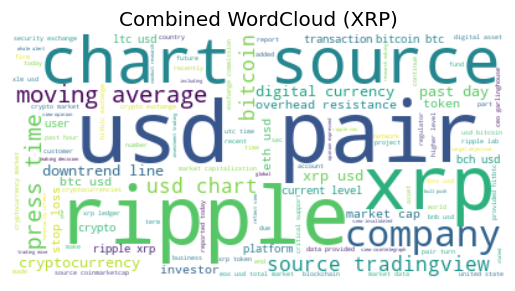

In [27]:
cloud_xrp_textBlob_combined  = createWordCloud(xrp_sentiment, 'preprocessed_text')
plt.imshow(cloud_xrp_textBlob_combined, interpolation='bilinear')
plt.title('Combined WordCloud (XRP)')
plt.axis("off")
plt.show()

In [28]:
pd.Series(" ".join(xrp_sentiment['preprocessed_text']).split()).value_counts()[:10].to_frame('count')

count
xrp      16628
ripple   14959
usd      10644
market    7843
bitcoin   7771
level     7522
crypto    6710
support   6568
time      5847
pair      5836

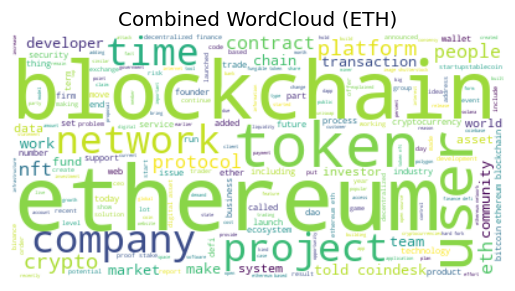

In [29]:
cloud_ethereum_textBlob_combined  = createWordCloud(eth_sentiment, 'preprocessed_text')
plt.imshow(cloud_ethereum_textBlob_combined, interpolation='bilinear')
plt.title('Combined WordCloud (ETH)')
plt.axis("off")
plt.show()

In [30]:
pd.Series(" ".join(eth_sentiment['preprocessed_text']).split()).value_counts()[:10].to_frame('count')

count
ethereum        19634
blockchain      11266
token           10227
crypto           7561
eth              6999
user             6932
network          6916
market           6548
time             5491
project          5171
platform         4885
coindesk         4804
company          4782
exchange         4583
transaction      4579
data             4225
defi             4179
chain            4178
decentralized    3996
asset            3986
contract         3832
developer        3717
based            3656
cryptocurrency   3480
protocol         3427
digital          3257
fund             2988
work             2978
investor         2955
community        2955

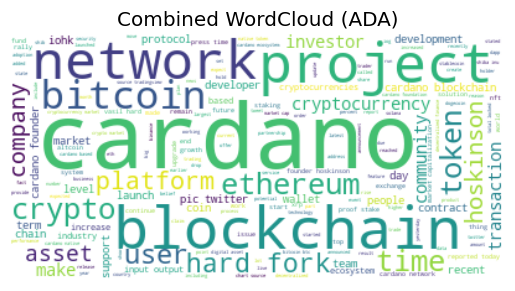

In [31]:
cloud_cardano_textBlob_combined  = createWordCloud(ada_sentiment, 'preprocessed_text')
plt.imshow(cloud_cardano_textBlob_combined, interpolation='bilinear')
plt.title('Combined WordCloud (ADA)')
plt.axis("off")
plt.show()

In [32]:
pd.Series(" ".join(ada_sentiment['preprocessed_text']).split()).value_counts()[:10].to_frame('count')

count
cardano      8716
market       2234
blockchain   2072
crypto       1978
token        1764
network      1750
ethereum     1742
bitcoin      1673
hoskinson    1653
project      1650

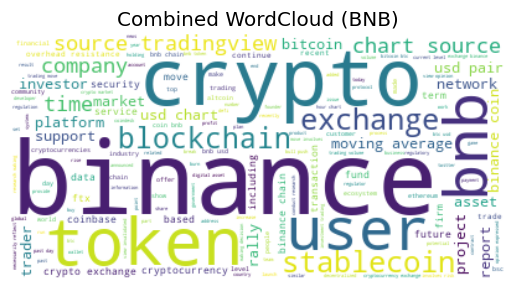

In [33]:
cloud_bnb_textBlob_combined  = createWordCloud(bnb_sentiment, 'preprocessed_text')
plt.imshow(cloud_bnb_textBlob_combined, interpolation='bilinear')
plt.title('Combined WordCloud (BNB)')
plt.axis("off")
plt.show()

In [34]:
pd.Series(" ".join(bnb_sentiment['preprocessed_text']).split()).value_counts()[:10].to_frame('count')

count
binance    1459
exchange   1001
crypto      937
bnb         933
usd         784
token       707
market      640
bull        565
coin        537
pair        532

### TextBlob
-  more accurate for longer, more formal text

In [35]:
def get_polarity(text):
    return TextBlob(text).sentiment[0]
def get_subjectivity(text):
    return TextBlob(text).sentiment[1]
def get_sentiment_textblob(score):
    if score > 0:
        return 'positive'
    elif score == 0:
        return 'neutral'
    else:
        return 'negative'

##### Bitcoin 

In [36]:
%%time
# Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments.
btc_sentiment['textBlob_polarity'] = btc_sentiment.preprocessed_text.apply(get_polarity)
btc_sentiment['textBlob_sentiment'] = btc_sentiment.textBlob_polarity.apply(get_sentiment_textblob)
# Subjectivity is also a float that lies in the range of [0,1]. Subjective sentences generally refer to opinion, emotion, or judgment.
# where 0.0 is very objective and 1.0 is very subjective.
btc_sentiment['textBlob_subjectivity'] = btc_sentiment.preprocessed_text.apply(get_subjectivity)
btc_sentiment[['textBlob_polarity','textBlob_subjectivity']].describe()

CPU times: total: 1min 40s
Wall time: 1min 41s


textBlob_polarity  textBlob_subjectivity
count       34183.000000           34183.000000
mean            0.037354               0.402309
std             0.081601               0.104622
min            -0.500000               0.000000
25%            -0.010417               0.337494
50%             0.035296               0.404386
75%             0.083780               0.468523
max             0.800000               1.000000

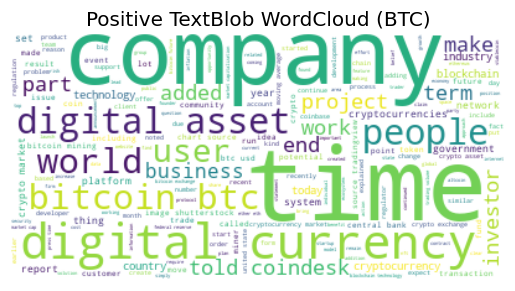

In [37]:
cloud_btc_textBlob_positive  = createWordCloud(btc_sentiment[btc_sentiment.textBlob_sentiment=='positive'], 'preprocessed_text')
plt.title('Positive TextBlob WordCloud (BTC)')
plt.imshow(cloud_btc_textBlob_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
pd.Series(" ".join(btc_sentiment[btc_sentiment.textBlob_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
bitcoin         184406
crypto           63980
market           61678
btc              38315
exchange         37546
time             37175
blockchain       34329
asset            32240
company          31793
digital          31335
cryptocurrency   31145
currency         27985
coindesk         25580
trading          24090
user             22804
investor         22654
network          21942
transaction      20447
financial        19975
people           19438
data             19080
mining           18625
payment          18580
token            18524
service          18246
ethereum         18244
fund             18148
technology       17385
future           17117
world            16686

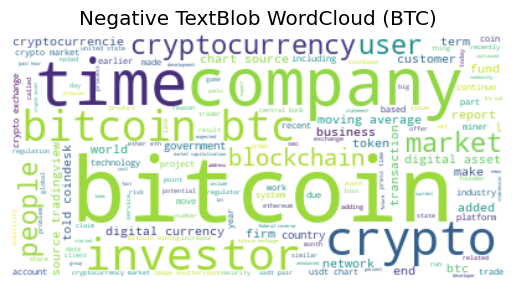

In [39]:
cloud_btc_textBlob_negative = createWordCloud(btc_sentiment[btc_sentiment.textBlob_sentiment=='negative'], 'preprocessed_text')
plt.title('Negative TextBlob WordCloud (BTC)')
plt.imshow(cloud_btc_textBlob_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
pd.Series(" ".join(btc_sentiment[btc_sentiment.textBlob_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
bitcoin         60610
crypto          23236
market          22508
btc             16525
exchange        15415
time            13233
cryptocurrency  12007
company         11207
asset           11058
trading         10130
digital          9184
level            8503
coindesk         8423
firm             8407
investor         8279
blockchain       8276
fund             7587
chart            7199
currency         7071
data             6859
support          6857
mining           6804
user             6125
usdt             6054
financial        5902
source           5797
past             5759
investment       5699
based            5521
transaction      5519

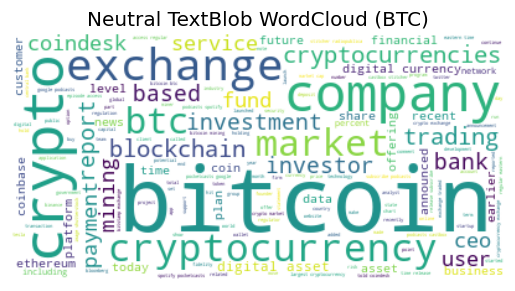

In [41]:
cloud_btc_textBlob_neutral = createWordCloud(btc_sentiment[btc_sentiment.textBlob_sentiment=='neutral'], 'preprocessed_text')
plt.title('Neutral TextBlob WordCloud (BTC)')
plt.imshow(cloud_btc_textBlob_neutral, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
pd.Series(" ".join(btc_sentiment[btc_sentiment.textBlob_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
bitcoin             698
crypto              274
exchange            203
cryptocurrency      195
market              179
company             161
time                149
digital             140
asset               130
btc                 111
bank                105
trading              98
mining               91
blockchain           88
cryptocurrencies     82
service              80
coindesk             79
payment              78
currency             77
investment           76
investor             72
financial            72
report               70
podcasts             70
based                69
today                69
fund                 69
ceo                  62
largest              60
user                 56

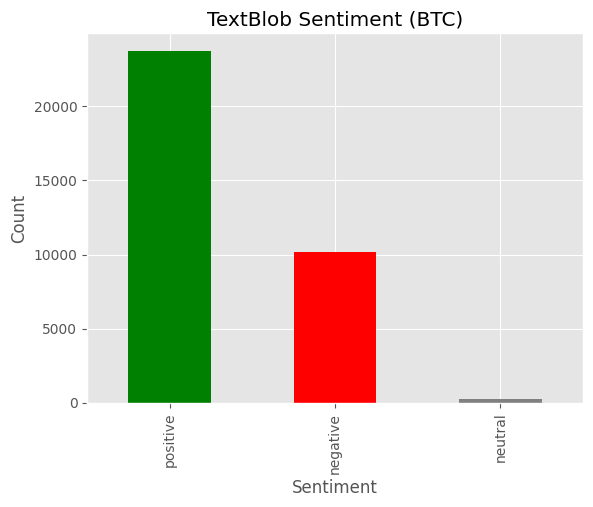

In [43]:
btc_sentiment.textBlob_sentiment.value_counts().plot(kind='bar',color=['green', 'red', 'grey'], title="TextBlob Sentiment (BTC)")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [44]:
btc_sentiment.textBlob_sentiment.value_counts(normalize=True).to_frame()

textBlob_sentiment
positive            0.694585
negative            0.297721
neutral             0.007694

##### Ripple

In [45]:
%%time
# Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments.
xrp_sentiment['textBlob_polarity'] = xrp_sentiment.preprocessed_text.apply(get_polarity)
xrp_sentiment['textBlob_sentiment'] = xrp_sentiment.textBlob_polarity.apply(get_sentiment_textblob)
# Subjectivity is also a float that lies in the range of [0,1]. Subjective sentences generally refer to opinion, emotion, or judgment.
# where 0.0 is very objective and 1.0 is very subjective.
xrp_sentiment['textBlob_subjectivity'] = xrp_sentiment.preprocessed_text.apply(get_subjectivity)
xrp_sentiment[['textBlob_polarity','textBlob_subjectivity']].describe()

CPU times: total: 9.44 s
Wall time: 9.5 s


textBlob_polarity  textBlob_subjectivity
count        3990.000000            3990.000000
mean            0.028726               0.407764
std             0.086447               0.108738
min            -0.338889               0.000000
25%            -0.026739               0.345480
50%             0.020833               0.410197
75%             0.075572               0.471116
max             0.500000               1.000000

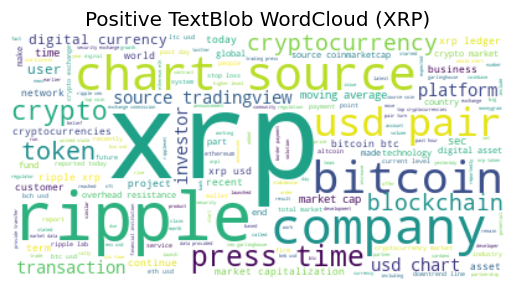

In [46]:
cloud_xrp_textBlob_positive  = createWordCloud(xrp_sentiment[xrp_sentiment.textBlob_sentiment=='positive'], 'preprocessed_text')
plt.imshow(cloud_xrp_textBlob_positive, interpolation='bilinear')
plt.title('Positive TextBlob WordCloud (XRP)')
plt.axis("off")
plt.show()

In [47]:
pd.Series(" ".join(xrp_sentiment[xrp_sentiment.textBlob_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
xrp              9550
ripple           9308
market           4841
bitcoin          4803
usd              4299
crypto           4156
time             3638
level            3320
exchange         3094
cryptocurrency   2988
company          2814
coin             2776
support          2667
trading          2642
payment          2573
blockchain       2553
percent          2550
chart            2475
pair             2226
bull             2202
source           2142
sec              2047
digital          2045
token            1941
top              1800
resistance       1762
btc              1735
ethereum         1729
today            1674
asset            1660

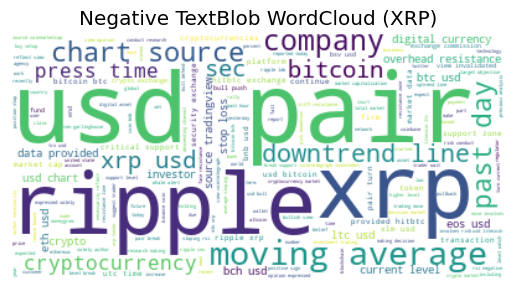

In [48]:
cloud_xrp_textBlob_negative  = createWordCloud(xrp_sentiment[xrp_sentiment.textBlob_sentiment=='negative'], 'preprocessed_text')
plt.imshow(cloud_xrp_textBlob_negative, interpolation='bilinear')
plt.title('Negative TextBlob WordCloud (XRP)')
plt.axis("off")
plt.show()

In [49]:
pd.Series(" ".join(xrp_sentiment[xrp_sentiment.textBlob_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
xrp              6985
usd              6345
ripple           5516
level            4196
support          3898
pair             3608
bull             3061
market           2982
bitcoin          2958
break            2612
crypto           2517
resistance       2507
exchange         2369
sec              2218
time             2189
bear             1978
cryptocurrency   1961
trading          1945
day              1912
moving           1781
move             1770
average          1726
position         1724
line             1609
trader           1564
chart            1562
past             1508
company          1448
security         1447
btc              1394

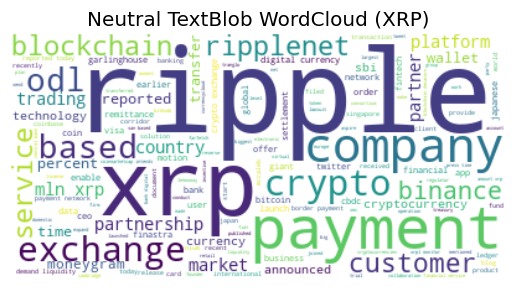

In [50]:
cloud_xrp_textBlob_neutral = createWordCloud(xrp_sentiment[xrp_sentiment.textBlob_sentiment=='neutral'], 'preprocessed_text')
plt.title('Neutral TextBlob WordCloud (XRP)')
plt.imshow(cloud_xrp_textBlob_neutral, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
pd.Series(" ".join(xrp_sentiment[xrp_sentiment.textBlob_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
ripple         135
xrp             93
payment         77
company         56
exchange        37
crypto          37
based           28
currency        27
service         26
blockchain      25
reported        24
odl             23
ripplenet       22
partnership     22
bank            20
mln             20
customer        20
time            20
digital         20
market          20
sbi             19
binance         18
platform        17
today           17
network         17
partner         17
country         16
trading         16
transfer        15
wallet          15

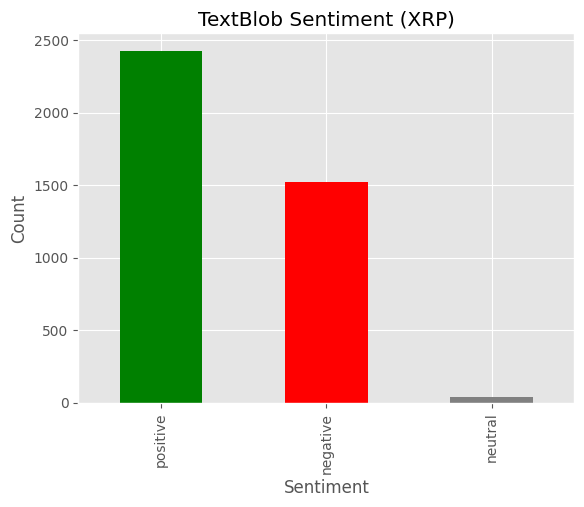

In [52]:
xrp_sentiment.textBlob_sentiment.value_counts().plot(kind='bar', color=['green', 'red', 'grey'], title="TextBlob Sentiment (XRP)")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [53]:
xrp_sentiment.textBlob_sentiment.value_counts(normalize=True).to_frame()

textBlob_sentiment
positive            0.608271
negative            0.381704
neutral             0.010025

##### Ethereum 

In [54]:
%%time
# Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments.
eth_sentiment['textBlob_polarity'] = eth_sentiment.preprocessed_text.apply(get_polarity)
eth_sentiment['textBlob_sentiment'] = eth_sentiment.textBlob_polarity.apply(get_sentiment_textblob)
# Subjectivity is also a float that lies in the range of [0,1]. Subjective sentences generally refer to opinion, emotion, or judgment.
# where 0.0 is very objective and 1.0 is very subjective.
eth_sentiment['textBlob_subjectivity'] = eth_sentiment.preprocessed_text.apply(get_subjectivity)
eth_sentiment[['textBlob_polarity','textBlob_subjectivity']].describe()

CPU times: total: 12.2 s
Wall time: 12.3 s


textBlob_polarity  textBlob_subjectivity
count        5128.000000            5128.000000
mean            0.047864               0.436330
std             0.097024               0.112886
min            -0.500000               0.000000
25%            -0.009819               0.365246
50%             0.045394               0.437500
75%             0.101673               0.505587
max             0.545238               1.000000

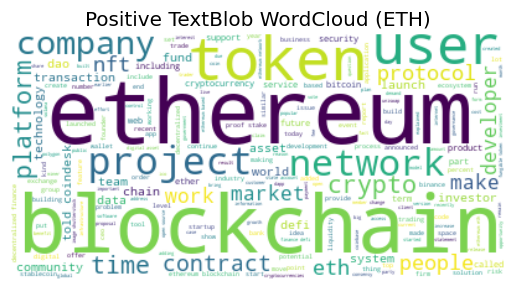

In [55]:
cloud_ethereum_textBlob_positive  = createWordCloud(eth_sentiment[eth_sentiment.textBlob_sentiment=='positive'], 'preprocessed_text')
plt.imshow(cloud_ethereum_textBlob_positive, interpolation='bilinear')
plt.title('Positive TextBlob WordCloud (ETH)')
plt.axis("off")
plt.show()

In [56]:
pd.Series(" ".join(eth_sentiment[eth_sentiment.textBlob_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
ethereum        14359
blockchain       8671
token            7829
crypto           5605
network          5160
user             5133
eth              4856
market           4792
project          4083
time             3937
platform         3738
coindesk         3720
company          3553
transaction      3277
defi             3246
exchange         3245
chain            3229
decentralized    3084
data             3068
asset            2953
contract         2952
developer        2726
protocol         2719
based            2693
cryptocurrency   2457
work             2448
digital          2387
community        2348
technology       2348
people           2273

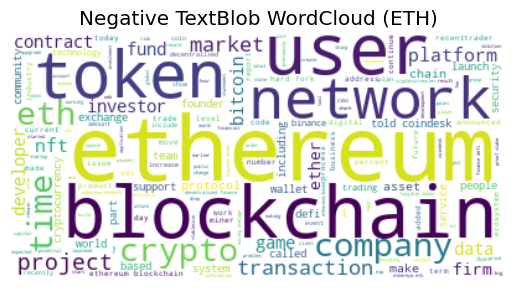

In [57]:
cloud_ethereum_textBlob_negative  = createWordCloud(eth_sentiment[eth_sentiment.textBlob_sentiment=='negative'], 'preprocessed_text')
plt.imshow(cloud_ethereum_textBlob_negative, interpolation='bilinear')
plt.title('Negative TextBlob WordCloud (ETH)')
plt.axis("off")
plt.show()

In [58]:
pd.Series(" ".join(eth_sentiment[eth_sentiment.textBlob_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
ethereum         5171
blockchain       2556
token            2355
eth              2111
crypto           1904
user             1778
network          1735
market           1730
time             1536
exchange         1299
transaction      1286
company          1198
data             1147
platform         1122
project          1073
coindesk         1071
asset            1004
game             1001
cryptocurrency    992
developer         988
based             939
chain             938
defi              919
decentralized     895
firm              884
contract          878
bitcoin           856
digital           845
trading           823
investor          822

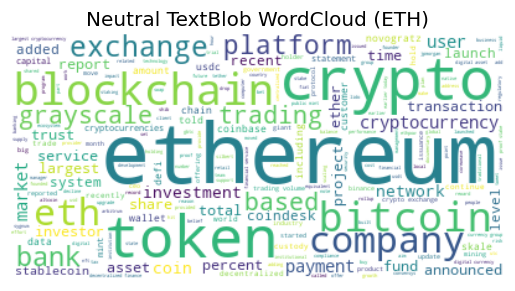

In [59]:
cloud_ethereum_textBlob_neutral = createWordCloud(eth_sentiment[eth_sentiment.textBlob_sentiment=='neutral'], 'preprocessed_text')
plt.title('Neutral TextBlob WordCloud (ETH)')
plt.imshow(cloud_ethereum_textBlob_neutral, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
pd.Series(" ".join(eth_sentiment[eth_sentiment.textBlob_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
ethereum          104
crypto             52
token              43
exchange           39
blockchain         39
bitcoin            36
trading            33
eth                32
cryptocurrency     31
company            31
asset              29
bank               27
market             26
largest            26
platform           25
digital            25
grayscale          25
based              24
service            23
payment            22
user               21
coin               21
network            21
investment         21
trust              19
time               18
decentralized      17
percent            17
transaction        16
fund               16

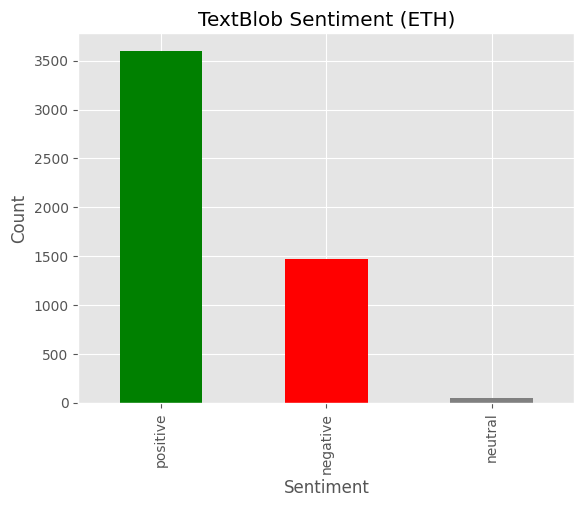

In [61]:
eth_sentiment.textBlob_sentiment.value_counts().plot(kind='bar',color=['green', 'red', 'grey'], title="TextBlob Sentiment (ETH)")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [62]:
eth_sentiment.textBlob_sentiment.value_counts(normalize=True).to_frame()

textBlob_sentiment
positive            0.702028
negative            0.287637
neutral             0.010335

##### Cardano 

In [63]:
%%time
# Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments.
ada_sentiment['textBlob_polarity'] = ada_sentiment.preprocessed_text.apply(get_polarity)
ada_sentiment['textBlob_sentiment'] = ada_sentiment.textBlob_polarity.apply(get_sentiment_textblob)
# Subjectivity is also a float that lies in the range of [0,1]. Subjective sentences generally refer to opinion, emotion, or judgment.
#where 0.0 is very objective and 1.0 is very subjective.
ada_sentiment['textBlob_subjectivity'] = ada_sentiment.preprocessed_text.apply(get_subjectivity)
ada_sentiment[['textBlob_polarity','textBlob_subjectivity']].describe()

CPU times: total: 3.09 s
Wall time: 3.1 s


textBlob_polarity  textBlob_subjectivity
count        1661.000000            1661.000000
mean            0.056794               0.457479
std             0.104814               0.113315
min            -0.400000               0.000000
25%            -0.006543               0.389583
50%             0.054762               0.458333
75%             0.116667               0.524722
max             1.000000               1.000000

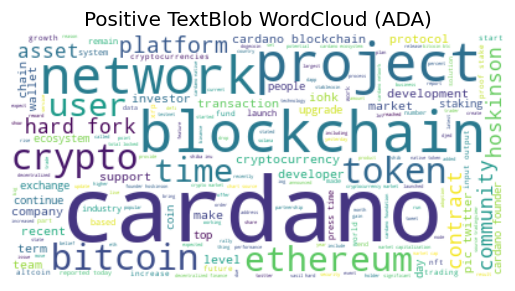

In [64]:
cloud_cardano_textBlob_positive  = createWordCloud(ada_sentiment[ada_sentiment.textBlob_sentiment=='positive'], 'preprocessed_text')
plt.imshow(cloud_cardano_textBlob_positive, interpolation='bilinear')
plt.title('Positive TextBlob WordCloud (ADA)')
plt.axis("off")
plt.show()

In [65]:
pd.Series(" ".join(ada_sentiment[ada_sentiment.textBlob_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
cardano          6760
market           1720
blockchain       1664
crypto           1489
network          1365
token            1362
ethereum         1350
project          1344
bitcoin          1271
time             1241
hoskinson        1124
cryptocurrency   1014
contract          937
asset             929
exchange          897
user              869
top               866
today             831
twitter           813
platform          808
trading           786
decentralized     732
community         707
coin              704
data              700
transaction       691
vasil             662
founder           655
support           612
level             610

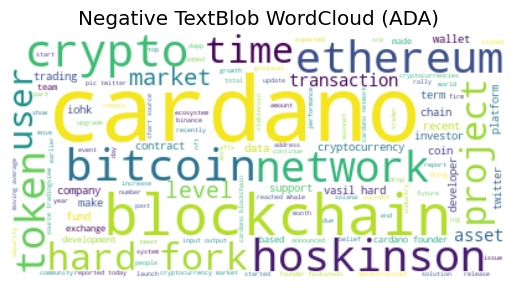

In [66]:
cloud_cardano_textBlob_negative  = createWordCloud(ada_sentiment[ada_sentiment.textBlob_sentiment=='negative'], 'preprocessed_text')
plt.imshow(cloud_cardano_textBlob_negative, interpolation='bilinear')
plt.title('Negative TextBlob WordCloud (ADA)')
plt.axis("off")
plt.show()

In [67]:
pd.Series(" ".join(ada_sentiment[ada_sentiment.textBlob_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
cardano          1913
hoskinson         517
market            514
crypto            485
cryptocurrency    470
bitcoin           398
token             393
blockchain        392
time              392
ethereum          388
network           381
hard              305
project           305
asset             302
exchange          296
twitter           290
level             281
fork              274
founder           262
transaction       262
user              256
trading           253
today             248
vasil             236
recent            227
data              222
contract          217
usd               209
support           207
past              204

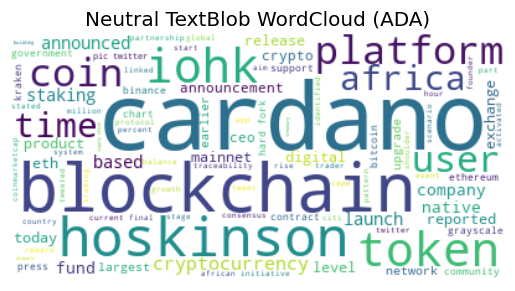

In [68]:
cloud_cardano_textBlob_neutral = createWordCloud(ada_sentiment[ada_sentiment.textBlob_sentiment=='neutral'], 'preprocessed_text')
plt.title('Neutral TextBlob WordCloud (ADA)')
plt.imshow(cloud_cardano_textBlob_neutral, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
pd.Series(" ".join(ada_sentiment[ada_sentiment.textBlob_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
cardano            43
blockchain         16
hoskinson          12
iohk                9
platform            9
coin                9
token               9
africa              8
user                8
time                8
cryptocurrency      8
staking             7
launch              7
announced           7
twitter             7
based               7
company             6
fund                6
native              6
level               5
exchange            5
eth                 5
mainnet             5
reported            5
product             5
today               5
digital             5
release             5
chain               5
fork                4

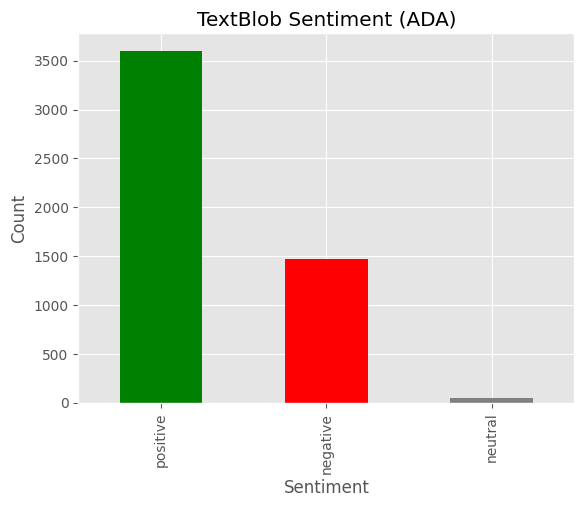

In [70]:
eth_sentiment.textBlob_sentiment.value_counts().plot(kind='bar',color=['green', 'red', 'grey'], title="TextBlob Sentiment (ADA)")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [71]:
eth_sentiment.textBlob_sentiment.value_counts(normalize=True).to_frame()

textBlob_sentiment
positive            0.702028
negative            0.287637
neutral             0.010335

##### Binance Coin 

In [72]:
%%time
# Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments.
bnb_sentiment['textBlob_polarity'] = bnb_sentiment.preprocessed_text.apply(get_polarity)
bnb_sentiment['textBlob_sentiment'] = bnb_sentiment.textBlob_polarity.apply(get_sentiment_textblob)
# Subjectivity is also a float that lies in the range of [0,1]. Subjective sentences generally refer to opinion, emotion, or judgment.
# where 0.0 is very objective and 1.0 is very subjective.
bnb_sentiment['textBlob_subjectivity'] = bnb_sentiment.preprocessed_text.apply(get_subjectivity)
bnb_sentiment[['textBlob_polarity','textBlob_subjectivity']].describe()

CPU times: total: 859 ms
Wall time: 900 ms


textBlob_polarity  textBlob_subjectivity
count         284.000000             284.000000
mean            0.033366               0.399830
std             0.072208               0.104494
min            -0.250000               0.000000
25%            -0.011245               0.350401
50%             0.028968               0.407019
75%             0.079852               0.456433
max             0.235648               0.750000

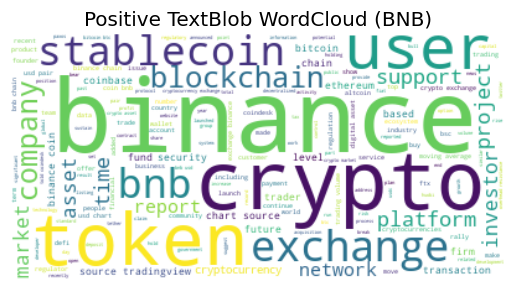

In [73]:
cloud_bnb_textBlob_positive  = createWordCloud(bnb_sentiment[bnb_sentiment.textBlob_sentiment=='positive'], 'preprocessed_text')
plt.imshow(cloud_bnb_textBlob_positive, interpolation='bilinear')
plt.title('Positive TextBlob WordCloud (BNB)')
plt.axis("off")
plt.show()

In [74]:
pd.Series(" ".join(bnb_sentiment[bnb_sentiment.textBlob_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
binance          1025
exchange          687
crypto            664
bnb               544
token             518
market            439
user              367
coin              362
usd               347
trading           345
chain             283
time              272
asset             265
support           265
platform          262
level             250
pair              244
cryptocurrency    240
blockchain        227
bull              226
source            217
company           216
bitcoin           215
chart             214
stablecoin        190
move              188
investor          185
project           183
financial         176
data              173

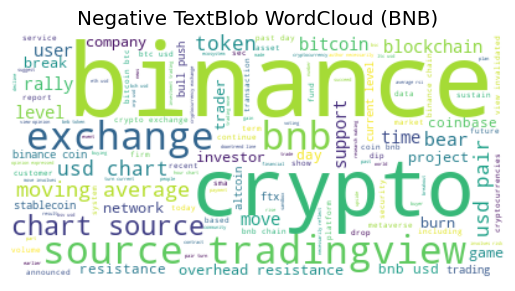

In [75]:
cloud_bnb_textBlob_negative  = createWordCloud(bnb_sentiment[bnb_sentiment.textBlob_sentiment=='negative'], 'preprocessed_text')
plt.imshow(cloud_bnb_textBlob_negative, interpolation='bilinear')
plt.title('Negative TextBlob WordCloud (BNB)')
plt.axis("off")
plt.show()

In [76]:
pd.Series(" ".join(bnb_sentiment[bnb_sentiment.textBlob_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
usd               437
binance           417
bnb               370
bull              339
exchange          300
pair              287
crypto            262
bear              236
level             229
resistance        214
source            209
chart             200
market            195
support           190
token             182
average           179
bitcoin           171
trading           170
coin              167
tradingview       162
moving            158
move              154
time              145
rally             128
cryptocurrency    118
rsi               117
day               117
view              116
btc               115
break             113

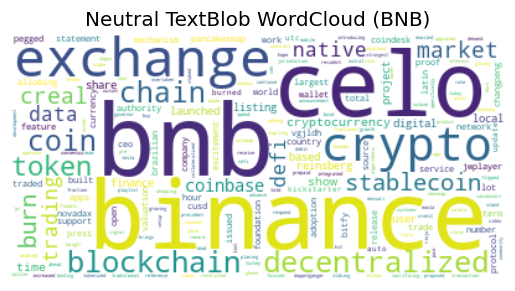

In [77]:
cloud_bnb_textBlob_neutral = createWordCloud(bnb_sentiment[bnb_sentiment.textBlob_sentiment=='neutral'], 'preprocessed_text')
plt.title('Neutral TextBlob WordCloud (BNB)')
plt.imshow(cloud_bnb_textBlob_neutral, interpolation='bilinear')
plt.axis("off")
plt.show()

In [78]:
pd.Series(" ".join(bnb_sentiment[bnb_sentiment.textBlob_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
bnb                19
binance            17
celo               15
exchange           14
crypto             11
decentralized       9
blockchain          9
chain               8
coin                8
token               7
burn                7
market              6
creal               6
defi                5
data                5
trading             5
coinbase            5
native              5
stablecoin          4
time                4
show                4
cryptocurrency      4
launched            3
local               3
listing             3
based               3
stablecoins         3
user                3
share               3
reinsberg           3

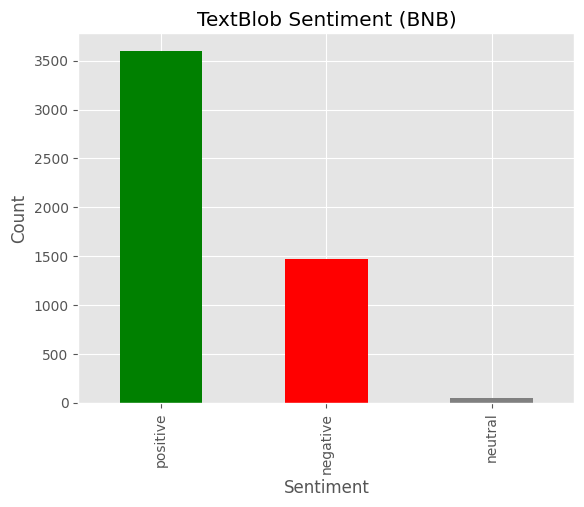

In [79]:
eth_sentiment.textBlob_sentiment.value_counts().plot(kind='bar',color=['green', 'red', 'grey'],
                                                     title="TextBlob Sentiment (BNB)")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [80]:
eth_sentiment.textBlob_sentiment.value_counts(normalize=True).to_frame()

textBlob_sentiment
positive            0.702028
negative            0.287637
neutral             0.010335

### Vader
- References: 
    - https://towardsdatascience.com/social-media-sentiment-analysis-in-python-with-vader-no-training-required-4bc6a21e87b8
- more accurate for social media text

In [81]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [82]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def get_sentiment_scores(df, column):
    df['polarity_scores_vader'] = df[column].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x))
    df['vader_compound'] = df['polarity_scores_vader'].apply(lambda x: x['compound'])
    df['vader_negative_score'] = df['polarity_scores_vader'].apply(lambda x: x['neg'])
    df['vader_neutral_score'] = df['polarity_scores_vader'].apply(lambda x: x['neu'])
    df['vader_positive_score'] = df['polarity_scores_vader'].apply(lambda x: x['pos'])    
    return df

#https://towardsdatascience.com/social-media-sentiment-analysis-in-python-with-vader-no-training-required-4bc6a21e87b8
#a positive sentiment, vader_compound ≥ 0.05, a negative sentiment, vader_compound ≤ -0.05, a neutral sentiment, the vader_compound is between ]-0.05, 0.05[
def get_sentiment_vader(score):
    if score >= 0.5:
        return 'positive'
    elif score <= -0.5:
        return 'negative'
    elif score > -0.5 and score < 0.5:
        return 'neutral'

##### Bitcoin

In [83]:
%%time
btc_sentiment = get_sentiment_scores(btc_sentiment, 'preprocessed_text')
btc_sentiment['vader_sentiment'] = btc_sentiment['vader_compound'].apply(get_sentiment_vader)
btc_sentiment[['vader_compound','vader_negative_score','vader_neutral_score','vader_positive_score']].describe()

CPU times: total: 6min 51s
Wall time: 6min 52s


vader_compound  vader_negative_score  vader_neutral_score  \
count    34183.000000          34183.000000         34183.000000   
mean         0.515524              0.080810             0.771232   
std          0.706365              0.060477             0.070574   
min         -0.999600              0.000000             0.396000   
25%          0.273200              0.035000             0.727000   
50%          0.924600              0.071000             0.772000   
75%          0.983100              0.114000             0.817000   
max          0.999900              0.545000             1.000000   

       vader_positive_score  
count          34183.000000  
mean               0.147960  
std                0.056748  
min                0.000000  
25%                0.110000  
50%                0.145000  
75%                0.182000  
max                0.459000

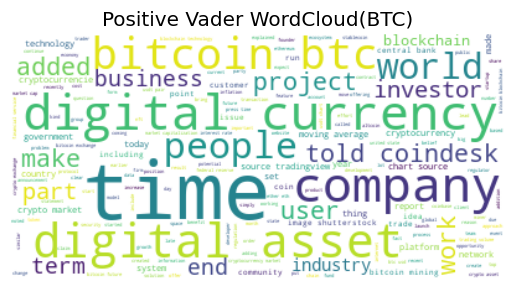

In [84]:
cloud_btc_vader_positive = createWordCloud(btc_sentiment[btc_sentiment.vader_sentiment=='positive'], 'preprocessed_text')
plt.imshow(cloud_btc_vader_positive, interpolation='bilinear')
plt.title('Positive Vader WordCloud(BTC)')
plt.axis("off")
plt.show()

In [85]:
pd.Series(" ".join(btc_sentiment[btc_sentiment.vader_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
bitcoin         190099
crypto           67049
market           63996
exchange         39623
btc              39012
time             37492
asset            37370
blockchain       36440
company          35203
digital          33926
cryptocurrency   31879
currency         27791
coindesk         26964
trading          26432
investor         24783
user             22873
network          22070
token            20392
transaction      20233
fund             20135
financial        20084
data             19758
payment          19366
level            19209
service          18914
mining           18908
ethereum         18907
people           18900
future           18266
technology       18132

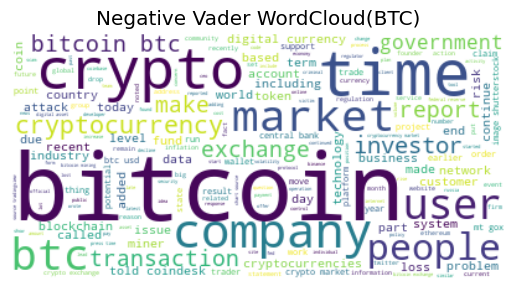

In [86]:
cloud_btc_vader_negative = createWordCloud(btc_sentiment[btc_sentiment.vader_sentiment=='negative'], 'preprocessed_text')
plt.imshow(cloud_btc_vader_negative, interpolation='bilinear')
plt.title('Negative Vader WordCloud(BTC)')
plt.axis("off")
plt.show()

In [87]:
pd.Series(" ".join(btc_sentiment[btc_sentiment.vader_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
bitcoin         36858
crypto          14396
market          13543
btc             10190
exchange         9239
time             8689
cryptocurrency   7572
company          5364
trading          5035
currency         5032
coindesk         4946
user             4515
mining           4449
digital          4374
transaction      4344
blockchain       4304
financial        4201
investor         4140
data             4088
fund             4050
asset            3973
bank             3870
people           3865
risk             3817
network          3734
chart            3400
report           3334
level            3262
service          3228
government       3225

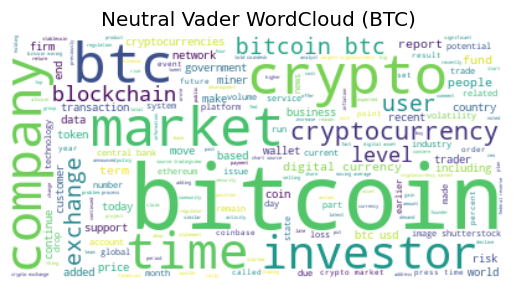

In [88]:
cloud_btc_vader_neutral = createWordCloud(btc_sentiment[btc_sentiment.vader_sentiment=='neutral'], 'preprocessed_text')
plt.imshow(cloud_btc_vader_neutral, interpolation='bilinear')
plt.title('Neutral Vader WordCloud (BTC)')
plt.axis("off")
plt.show()

In [89]:
pd.Series(" ".join(btc_sentiment[btc_sentiment.vader_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
bitcoin         18757
market           6826
crypto           6045
btc              5749
time             4376
exchange         4302
cryptocurrency   3896
trading          2851
company          2594
digital          2359
currency         2310
chart            2270
coindesk         2172
mining           2163
data             2139
asset            2085
investor         2082
level            2043
blockchain       1949
bank             1764
financial        1664
hour             1654
fund             1619
user             1597
move             1581
trader           1577
firm             1523
risk             1501
source           1499
future           1489

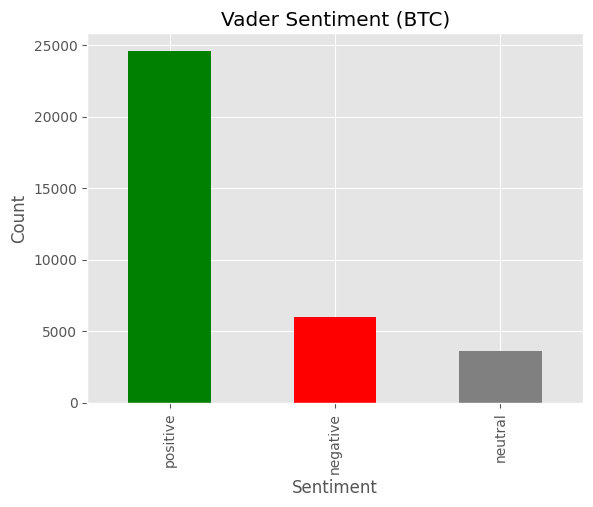

In [90]:
btc_sentiment.vader_sentiment.value_counts().plot(kind="bar", color=['green', 'red', 'grey'],
                                                     title="Vader Sentiment (BTC)")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [91]:
btc_sentiment.vader_sentiment.value_counts(normalize=True).to_frame()

vader_sentiment
positive         0.719802
negative         0.174941
neutral          0.105257

##### XRP/Ripple

In [92]:
%%time
xrp_sentiment = get_sentiment_scores(xrp_sentiment, 'preprocessed_text')
xrp_sentiment['vader_sentiment'] = xrp_sentiment['vader_compound'].apply(get_sentiment_vader)
xrp_sentiment[['vader_compound','vader_negative_score','vader_neutral_score','vader_positive_score']].describe()

CPU times: total: 42.5 s
Wall time: 42.7 s


vader_compound  vader_negative_score  vader_neutral_score  \
count     3990.000000           3990.000000          3990.000000   
mean         0.559841              0.073391             0.781351   
std          0.629087              0.060458             0.078065   
min         -0.998600              0.000000             0.420000   
25%          0.458800              0.024000             0.728000   
50%          0.891000              0.063000             0.780000   
75%          0.965200              0.110750             0.837000   
max          0.999400              0.388000             1.000000   

       vader_positive_score  
count           3990.000000  
mean               0.145264  
std                0.055360  
min                0.000000  
25%                0.108000  
50%                0.141500  
75%                0.177000  
max                0.399000

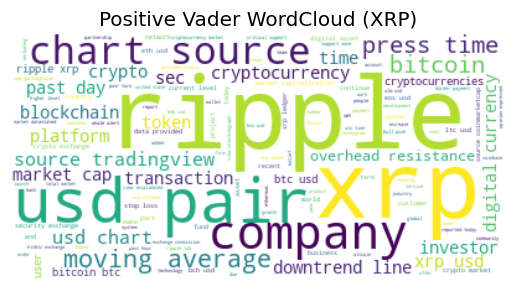

In [93]:
cloud_xrp_vader_positive = createWordCloud(xrp_sentiment[xrp_sentiment.vader_sentiment=='positive'], 'preprocessed_text')
plt.imshow(cloud_xrp_vader_positive, interpolation='bilinear')
plt.title('Positive Vader WordCloud (XRP)')
plt.axis("off")
plt.show()

In [94]:
pd.Series(" ".join(xrp_sentiment[xrp_sentiment.vader_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
xrp             12306
ripple          11561
usd              7307
market           5853
bitcoin          5533
crypto           5177
level            5105
support          4954
time             4257
exchange         4005
pair             3917
bull             3741
cryptocurrency   3618
company          3469
trading          3299
payment          3200
sec              3148
coin             3088
blockchain       3070
chart            2943
resistance       2936
percent          2708
break            2693
digital          2604
source           2537
move             2372
bear             2371
day              2285
token            2284
btc              2230

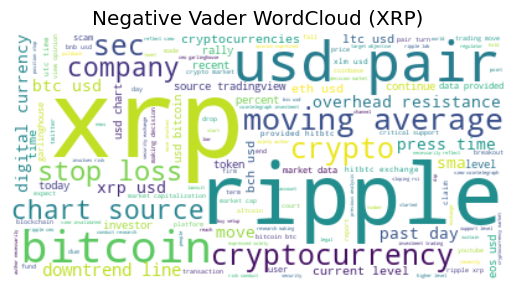

In [96]:
cloud_xrp_vader_negative = createWordCloud(xrp_sentiment[xrp_sentiment.vader_sentiment=='negative'], 'preprocessed_text')
plt.imshow(cloud_xrp_vader_negative, interpolation='bilinear')
plt.title('Negative Vader WordCloud (XRP)')
plt.axis("off")
plt.show()

In [97]:
pd.Series(" ".join(xrp_sentiment[xrp_sentiment.vader_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
usd              2321
xrp              2013
ripple           1629
level            1614
pair             1335
bitcoin          1275
support          1094
market           1076
bull             1040
break             979
resistance        951
crypto            845
time              821
position          779
cryptocurrency    752
exchange          734
trader            696
stop              671
move              670
day               666
trading           658
bear              612
chart             611
loss              611
line              606
percent           603
sec               561
sma               557
moving            540
btc               533

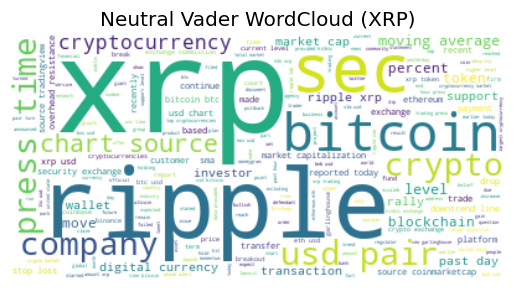

In [98]:
cloud_xrp_vader_neutral = createWordCloud(xrp_sentiment[xrp_sentiment.vader_sentiment=='neutral'], 'preprocessed_text')
plt.imshow(cloud_xrp_vader_neutral, interpolation='bilinear')
plt.title('Neutral Vader WordCloud (XRP)')
plt.axis("off")
plt.show()

In [99]:
pd.Series(" ".join(xrp_sentiment[xrp_sentiment.vader_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
xrp              2309
ripple           1769
usd              1016
bitcoin           963
market            914
level             803
time              769
exchange          761
crypto            688
trading           646
cryptocurrency    593
pair              584
sec               562
support           520
coin              510
percent           503
chart             484
bull              483
company           434
today             391
resistance        382
press             370
source            370
btc               369
security          364
move              360
break             359
token             356
day               348
past              336

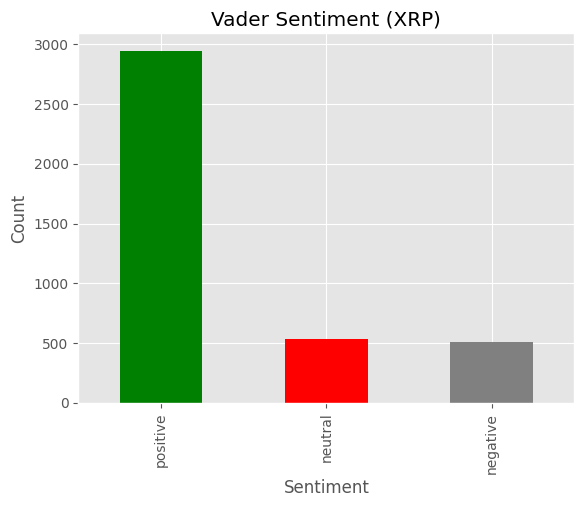

In [100]:
xrp_sentiment.vader_sentiment.value_counts().plot(kind='bar',
                                                  color=['green', 'red', 'grey'], 
                                                  title="Vader Sentiment (XRP)"
                                                 )
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [101]:
xrp_sentiment.vader_sentiment.value_counts( normalize=True).to_frame()

vader_sentiment
positive         0.738095
neutral          0.133584
negative         0.128321

##### Ethereum

In [102]:
%%time
eth_sentiment = get_sentiment_scores(eth_sentiment, 'preprocessed_text')
eth_sentiment['vader_sentiment'] = eth_sentiment['vader_compound'].apply(get_sentiment_vader)
eth_sentiment[['vader_compound','vader_negative_score','vader_neutral_score','vader_positive_score']].describe()

CPU times: total: 45.7 s
Wall time: 45.7 s


vader_compound  vader_negative_score  vader_neutral_score  \
count     5128.000000           5128.000000          5128.000000   
mean         0.603709              0.062540             0.790781   
std          0.633164              0.059397             0.073614   
min         -0.999500              0.000000             0.411000   
25%          0.612400              0.019000             0.744000   
50%          0.933700              0.046000             0.795000   
75%          0.980850              0.090000             0.841000   
max          0.999800              0.378000             1.000000   

       vader_positive_score  
count           5128.000000  
mean               0.146678  
std                0.058306  
min                0.000000  
25%                0.108000  
50%                0.143000  
75%                0.181000  
max                0.504000

Quick EDA

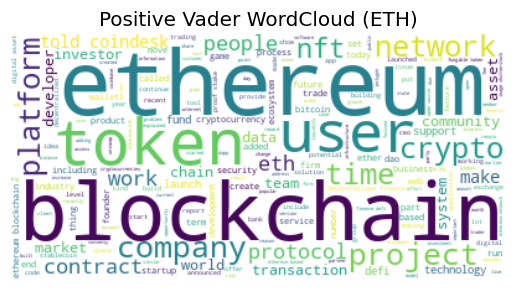

In [103]:
cloud_eth_vader_positive = createWordCloud(eth_sentiment[eth_sentiment.vader_sentiment=='positive'], 'preprocessed_text')
plt.imshow(cloud_eth_vader_positive, interpolation='bilinear')
plt.title('Positive Vader WordCloud (ETH)')
plt.axis("off")
plt.show()

In [104]:
pd.Series(" ".join(eth_sentiment[eth_sentiment.vader_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
ethereum        15100
blockchain       9839
token            8781
crypto           6081
user             5664
network          5512
market           5367
eth              5229
project          4368
time             4257
platform         4180
company          4134
coindesk         4078
data             3591
transaction      3584
defi             3572
asset            3550
exchange         3522
chain            3382
decentralized    3380
based            3097
contract         3021
digital          2917
protocol         2871
developer        2827
technology       2606
cryptocurrency   2546
work             2531
investor         2505
make             2437

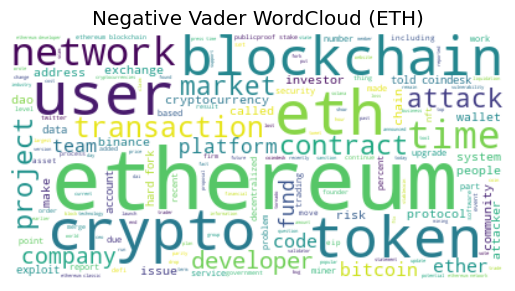

In [105]:
cloud_eth_vader_negative = createWordCloud(eth_sentiment[eth_sentiment.vader_sentiment=='negative'], 'preprocessed_text')
plt.imshow(cloud_eth_vader_negative, interpolation='bilinear')
plt.title('Negative Vader WordCloud (ETH)')
plt.axis("off")
plt.show()

In [106]:
pd.Series(" ".join(eth_sentiment[eth_sentiment.vader_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
ethereum         2775
eth              1001
crypto            974
token             959
network           886
blockchain        862
user              788
time              758
market            741
exchange          657
fund              630
transaction       629
developer         611
cryptocurrency    575
contract          562
attack            533
project           527
chain             493
coindesk          492
platform          472
community         453
ether             442
bitcoin           418
company           407
defi              399
address           382
decentralized     377
fork              373
code              373
team              364

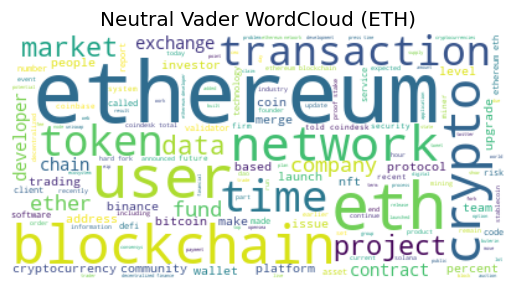

In [107]:
cloud_eth_vader_neutral = createWordCloud(eth_sentiment[eth_sentiment.vader_sentiment=='neutral'], 'preprocessed_text')
plt.imshow(cloud_eth_vader_neutral, interpolation='bilinear')
plt.title('Neutral Vader WordCloud (ETH)')
plt.axis("off")
plt.show()

In [108]:
pd.Series(" ".join(eth_sentiment[eth_sentiment.vader_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
ethereum         1759
eth               769
blockchain        565
network           518
crypto            506
token             487
user              480
time              476
market            440
exchange          404
transaction       366
cryptocurrency    359
data              308
chain             303
developer         279
project           276
ether             273
bitcoin           258
contract          249
company           241
fund              241
decentralized     239
coindesk          234
platform          233
based             226
wallet            222
defi              208
trading           205
protocol          198
today             195

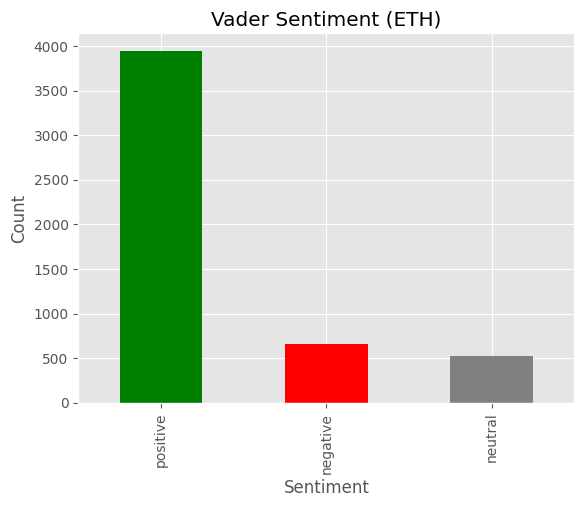

In [109]:
eth_sentiment.vader_sentiment.value_counts().plot(kind='bar',
                                                  color=['green', 'red', 'grey'], 
                                                  title="Vader Sentiment (ETH)"
                                                 )
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [110]:
eth_sentiment.vader_sentiment.value_counts(normalize=True).to_frame()

vader_sentiment
positive         0.769306
negative         0.128315
neutral          0.102379

##### Cardano

In [111]:
%%time
ada_sentiment = get_sentiment_scores(ada_sentiment, 'preprocessed_text')
ada_sentiment['vader_sentiment'] = ada_sentiment['vader_compound'].apply(get_sentiment_vader)
ada_sentiment[['vader_compound','vader_negative_score','vader_neutral_score','vader_positive_score']].describe()

CPU times: total: 14.7 s
Wall time: 14.7 s


vader_compound  vader_negative_score  vader_neutral_score  \
count     1661.000000           1661.000000          1661.000000   
mean         0.585729              0.069192             0.771854   
std          0.632497              0.062174             0.072911   
min         -0.997900              0.000000             0.509000   
25%          0.542300              0.022000             0.725000   
50%          0.924600              0.052000             0.774000   
75%          0.971900              0.101000             0.820000   
max          0.999700              0.391000             1.000000   

       vader_positive_score  
count           1661.000000  
mean               0.158951  
std                0.061655  
min                0.000000  
25%                0.115000  
50%                0.155000  
75%                0.196000  
max                0.440000

Qick EDA

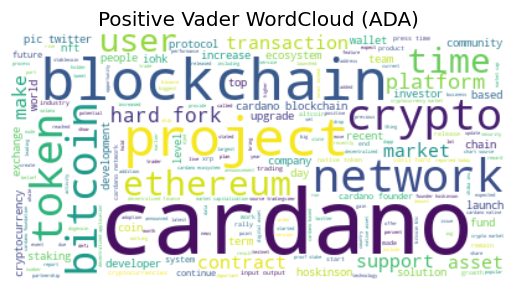

In [112]:
cloud_ada_vader_positive = createWordCloud(ada_sentiment[ada_sentiment.vader_sentiment=='positive'], 'preprocessed_text')
plt.imshow(cloud_ada_vader_positive, interpolation='bilinear')
plt.title('Positive Vader WordCloud (ADA)')
plt.axis("off")
plt.show()

In [113]:
pd.Series(" ".join(ada_sentiment[ada_sentiment.vader_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
cardano          7401
blockchain       1773
market           1756
network          1550
token            1496
crypto           1462
project          1450
ethereum         1300
time             1298
bitcoin          1182
asset            1086
hoskinson        1051
contract         1035
cryptocurrency   1032
user              935
exchange          888
platform          856
today             840
trading           836
top               834
transaction       817
decentralized     803
twitter           793
data              777
vasil             737
support           732
coin              721
community         690
chain             687
development       661

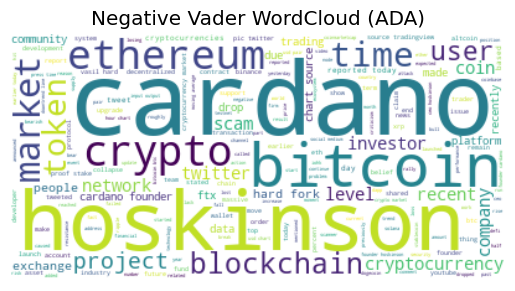

In [114]:
cloud_eth_vader_negative = createWordCloud(ada_sentiment[ada_sentiment.vader_sentiment=='negative'], 'preprocessed_text')
plt.imshow(cloud_eth_vader_negative, interpolation='bilinear')
plt.title('Negative Vader WordCloud (ADA)')
plt.axis("off")
plt.show()

In [115]:
pd.Series(" ".join(ada_sentiment[ada_sentiment.vader_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
cardano           668
hoskinson         388
crypto            323
bitcoin           311
market            297
cryptocurrency    272
ethereum          268
time              211
twitter           200
exchange          174
level             172
founder           169
blockchain        152
token             143
today             136
recent            128
user              123
usd               123
community         123
trading           113
project           105
chart             104
ceo               104
coin              102
investor          101
btc                99
reported           99
network            97
scam               96
hard               95

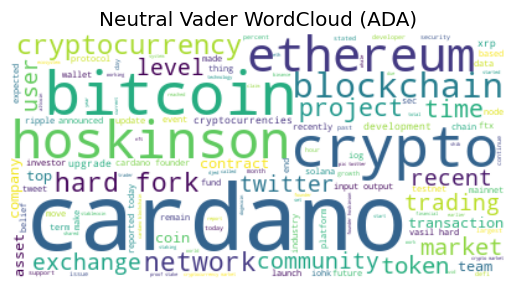

In [116]:
cloud_ada_vader_neutral = createWordCloud(ada_sentiment[ada_sentiment.vader_sentiment=='neutral'], 'preprocessed_text')
plt.imshow(cloud_ada_vader_neutral, interpolation='bilinear')
plt.title('Neutral Vader WordCloud (ADA)')
plt.axis("off")
plt.show()

In [117]:
pd.Series(" ".join(ada_sentiment[ada_sentiment.vader_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
cardano           647
hoskinson         214
crypto            193
cryptocurrency    188
market            181
bitcoin           180
ethereum          174
blockchain        147
exchange          136
time              132
token             125
hard              119
twitter           117
fork              111
today             108
founder           106
network           103
recent             97
project            95
vasil              93
trading            93
community          87
transaction        85
coin               84
level              82
ceo                80
asset              75
user               75
top                74
upgrade            72

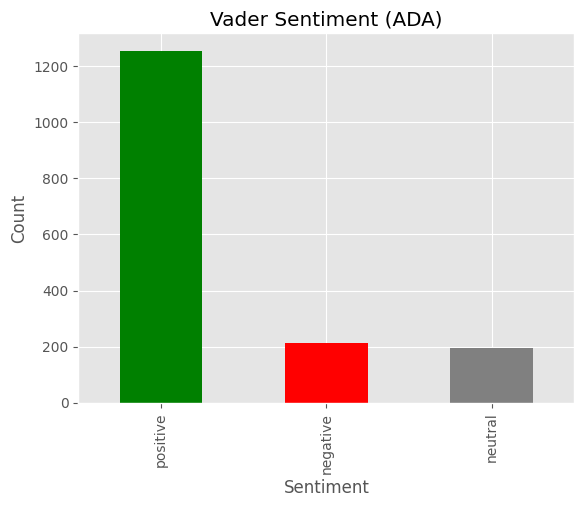

In [118]:
ada_sentiment.vader_sentiment.value_counts().plot(kind='bar',
                                                  color=['green', 'red', 'grey'], 
                                                  title="Vader Sentiment (ADA)"
                                                 )
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [119]:
ada_sentiment.vader_sentiment.value_counts(normalize=True).to_frame()

vader_sentiment
positive         0.754967
negative         0.128236
neutral          0.116797

##### Binance Coin

In [120]:
%%time
bnb_sentiment = get_sentiment_scores(bnb_sentiment, 'preprocessed_text')
bnb_sentiment['vader_sentiment'] = bnb_sentiment['vader_compound'].apply(get_sentiment_vader)
bnb_sentiment[['vader_compound','vader_negative_score','vader_neutral_score','vader_positive_score']].describe()

CPU times: total: 3.19 s
Wall time: 3.19 s


vader_compound  vader_negative_score  vader_neutral_score  \
count      284.000000            284.000000           284.000000   
mean         0.595902              0.070975             0.789092   
std          0.654274              0.051858             0.068369   
min         -0.997600              0.000000             0.622000   
25%          0.627525              0.031000             0.748000   
50%          0.936550              0.063500             0.787000   
75%          0.983300              0.100000             0.832250   
max          0.999200              0.279000             0.968000   

       vader_positive_score  
count            284.000000  
mean               0.139951  
std                0.051098  
min                0.012000  
25%                0.109000  
50%                0.139000  
75%                0.173000  
max                0.307000

Quick EDA

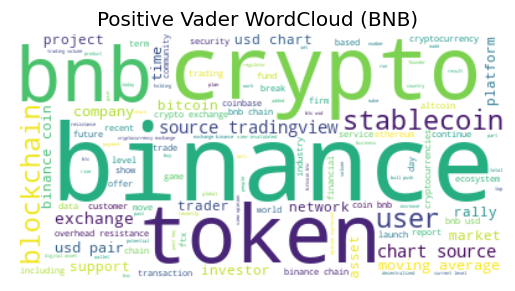

In [121]:
cloud_bnb_vader_positive = createWordCloud(bnb_sentiment[bnb_sentiment.vader_sentiment=='positive'], 'preprocessed_text')
plt.imshow(cloud_bnb_vader_positive, interpolation='bilinear')
plt.title('Positive Vader WordCloud (BNB)')
plt.axis("off")
plt.show()

In [122]:
pd.Series(" ".join(bnb_sentiment[bnb_sentiment.vader_sentiment=='positive']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
binance          1119
bnb               756
exchange          754
usd               749
crypto            734
token             597
market            572
bull              542
pair              514
level             443
trading           432
support           428
coin              428
source            391
chart             384
resistance        370
bitcoin           361
user              346
time              342
bear              341
asset             321
chain             315
move              315
cryptocurrency    301
tradingview       283
average           273
blockchain        269
moving            259
btc               239
platform          236

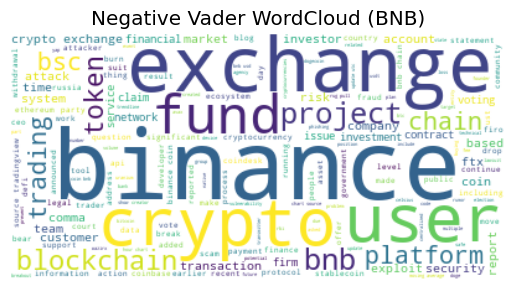

In [123]:
cloud_bnb_vader_negative = createWordCloud(bnb_sentiment[bnb_sentiment.vader_sentiment=='negative'], 'preprocessed_text')
plt.imshow(cloud_bnb_vader_negative, interpolation='bilinear')
plt.title('Negative Vader WordCloud (BNB)')
plt.axis("off")
plt.show()

In [124]:
pd.Series(" ".join(bnb_sentiment[bnb_sentiment.vader_sentiment=='negative']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
binance           203
exchange          150
crypto            136
bnb               107
user               97
fund               66
platform           62
project            60
coin               59
trading            57
chain              55
token              55
blockchain         47
time               46
bsc                46
attack             40
comma              40
investor           38
based              38
cryptocurrency     38
ftx                36
usd                35
market             35
transaction        34
report             34
security           34
team               33
system             33
risk               33
defi               32

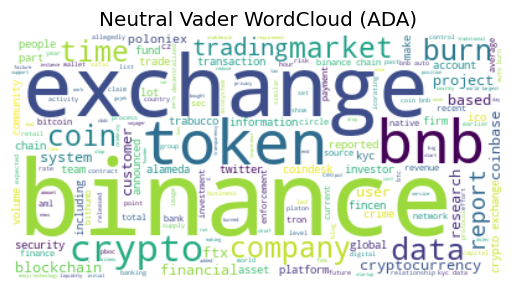

In [125]:
cloud_bnb_vader_neutral = createWordCloud(bnb_sentiment[bnb_sentiment.vader_sentiment=='neutral'], 'preprocessed_text')
plt.imshow(cloud_bnb_vader_neutral, interpolation='bilinear')
plt.title('Neutral Vader WordCloud (ADA)')
plt.axis("off")
plt.show()

In [126]:
pd.Series(" ".join(bnb_sentiment[bnb_sentiment.vader_sentiment=='neutral']['preprocessed_text']).split()).value_counts()[:30].to_frame('count')

count
binance           137
exchange           97
bnb                70
crypto             67
token              55
coin               50
data               41
burn               35
market             33
time               33
trading            31
company            29
chain              28
financial          26
report             24
cryptocurrency     23
based              21
project            21
blockchain         21
kyc                21
firm               20
system             20
coinbase           20
user               20
ftx                20
poloniex           19
research           19
customer           19
supply             17
people             17

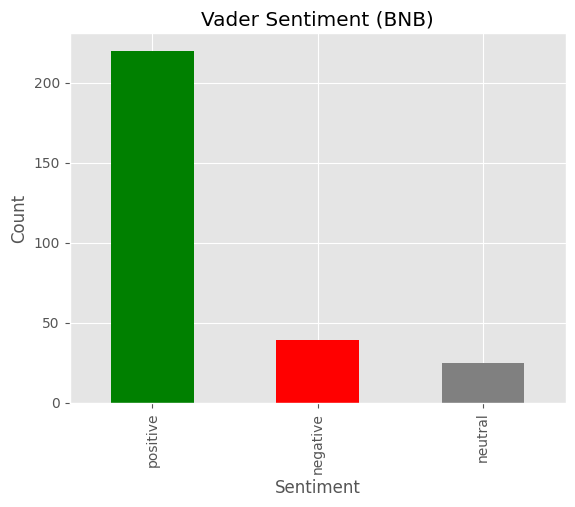

In [127]:
bnb_sentiment.vader_sentiment.value_counts().plot(kind='bar',
                                                  color=['green', 'red', 'grey'], 
                                                  title="Vader Sentiment (BNB)"
                                                 )
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [128]:
bnb_sentiment.vader_sentiment.value_counts(normalize=True).to_frame()

vader_sentiment
positive         0.774648
negative         0.137324
neutral          0.088028

In [129]:
dataframes = [btc_sentiment, xrp_sentiment, eth_sentiment, ada_sentiment, bnb_sentiment]
filenames = ['btc_sentiment.csv', 'xrp_sentiment.csv', 'eth_sentiment.csv', 'ada_sentiment.csv', 'bnb_sentiment.csv']

for df, filename in zip(dataframes, filenames):
    filepath = os.path.join(CURR_DIR, 'Datasets', filename)
    df.to_csv(filepath, index=False)

## FinBert - Pre-trained NLP model to analyze sentiment of financial text
- The following computations where run in GoogleColab
- References:
    - https://huggingface.co/ProsusAI/finbert
    - https://www.researchgate.net/post/Do_you_need_to_preprocess_text_for_BERT 
    - https://arxiv.org/pdf/1905.05583.pdf


### Text <= 512 Token

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import pandas as pd
import re

In [ ]:
# Load data
bnb_all_sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Import/bnb_sentiment.csv')
ada_all_sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Import/ada_sentiment.csv')
btc_all_sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Import/btc_sentiment.csv' )#,header=None, names=['coin','section','title','text','url','source','date','time','language','word_count','char_count','average_word_length','stopword_count','stopword_rate','preprocessed_text','textBlob_polarity','textBlob_sentiment','textBlob_subjectivity','polarity_scores_vader','vader_compound','vader_negative_score','vader_neutral_score','vader_pos_score','vader_sentiment'])
eth_all_sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Import/eth_sentiment.csv')
xrp_all_sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Import/xrp_sentiment.csv')

Maximum sequence length of BERT is 512. In https://arxiv.org/pdf/1905.05583.pdf head+tail (empirically select the first 128 and the last 382 tokens) achieved the best performance on the IMDb dataset (Type: Sentiment).

In [ ]:
def head_tail(text):
    #https://data-dive.com/german-nlp-binary-text-classification-of-reviews-part1
    # Remove whitespace pattern
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    # Remove html tags pattern
    RE_TAGS = re.compile(r"<[^>]+>")
    # Remove special character pattern
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    # Remove hyperlinks pattern
    RE_HYPERLINKS = re.compile(r'https?://\S+',re.IGNORECASE)
    
    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_WSPACE, " ", text)
    text = re.sub(RE_HYPERLINKS, " ", text)
    
    # select forst 128 and last 382 tokens
    text = text[:128] + text[-382:]
    return text

In [ ]:
bnb_all_sentiment['finBert_text'] = bnb_all_sentiment.text.apply(lambda x :head_tail(x))
ada_all_sentiment['finBert_text'] = ada_all_sentiment.text.apply(lambda x :head_tail(x))
btc_all_sentiment['finBert_text'] = btc_all_sentiment.text.apply(lambda x :head_tail(x))
eth_all_sentiment['finBert_text'] = eth_all_sentiment.text.apply(lambda x :head_tail(x))
xrp_all_sentiment['finBert_text'] = xrp_all_sentiment.text.apply(lambda x :head_tail(x))

In [ ]:
# Setup model
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
tokenizer = BertTokenizer.from_pretrained("ProsusAI/finbert")


In [ ]:
# Function to calculate sentiment
# positive= 0, negative = 1, neutral = 2
def sentiment_score_finBert(text):
  tokens = tokenizer.encode_plus(text, return_tensors='pt')["input_ids"]
  output = model(tokens)
  probs = torch.nn.functional.softmax(output[0], dim=-1)
  mean = probs.mean(dim=0)
  positive, negative, neutral = float(f'{mean[0]:.3f}'), float(f'{mean[1]:.3f}'), float(f'{mean[2]:.3f}')
  result = torch.argmax(mean).item()
  return positive, negative, neutral, result


In [ ]:
%%time
bnb_all_sentiment = bnb_all_sentiment.join(bnb_all_sentiment.finBert_text.apply(lambda x: sentiment_score_finBert(x[:512]))
                                            .apply(pd.Series)
                                            .rename(columns={0: 'finBert_positive_score',
                                                             1: 'finBert_negative_score',
                                                             2: 'finBert_neutral_score',
                                                             3: 'finBert_label'}))

CPU times: user 2min 16s, sys: 5.01 s, total: 2min 21s
Wall time: 2min 22s

In [ ]:
bnb_all_sentiment.to_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Export/bnb_all_sentiment.csv',index=False)

In [ ]:
%%time
ada_all_sentiment = ada_all_sentiment.join(ada_all_sentiment.finBert_text.apply(lambda x: sentiment_score_finBert(x[:512]))
                                            .apply(pd.Series)
                                            .rename(columns={0: 'finBert_positive_score',
                                                             1: 'finBert_negative_score',
                                                             2: 'finBert_neutral_score',
                                                             3: 'finBert_label'}))

CPU times: user 13min 15s, sys: 15.7 s, total: 13min 31s
Wall time: 13min 32s

In [ ]:
ada_all_sentiment.to_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Export/ada_all_sentiment.csv',index=False)

In [ ]:
%%time
xrp_all_sentiment = xrp_all_sentiment.join(xrp_all_sentiment.finBert_text.apply(lambda x: sentiment_score_finBert(x[:512]))
                                            .apply(pd.Series)
                                            .rename(columns={0: 'finBert_positive_score',
                                                             1: 'finBert_negative_score',
                                                             2: 'finBert_neutral_score',
                                                             3: 'finBert_label'}))

CPU times: user 29min 55s, sys: 34.8 s, total: 30min 30s
Wall time: 30min 31s

In [ ]:
xrp_all_sentiment.to_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Export/xrp_all_sentiment.csv',index=False)

In [ ]:
%%time
eth_all_sentiment = eth_all_sentiment.join(eth_all_sentiment.finBert_text.apply(lambda x: sentiment_score_finBert(x[:512]))
                                            .apply(pd.Series)
                                            .rename(columns={0: 'finBert_positive_score',
                                                             1: 'finBert_negative_score',
                                                             2: 'finBert_neutral_score',
                                                             3: 'finBert_label'}))

CPU times: user 37min 30s, sys: 41.4 s, total: 38min 11s
Wall time: 38min 12s

In [ ]:
eth_all_sentiment.to_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Export/eth_all_sentiment.csv',index=False)

In [ ]:
%%time
btc_all_sentiment = btc_all_sentiment.join(btc_all_sentiment.finBert_text.apply(lambda x: sentiment_score_finBert(x[:512]))
                                            .apply(pd.Series)
                                            .rename(columns={0: 'finBert_positive_score',
                                                             1: 'finBert_negative_score',
                                                             2: 'finBert_neutral_score',
                                                             3: 'finBert_label'}))

CPU times: user 4h 9min 4s, sys: 3min 26s, total: 4h 12min 31s
Wall time: 4h 12min 24s

In [ ]:
btc_all_sentiment.to_csv('/content/drive/MyDrive/Colab Notebooks/FINTECH/Colab/Export/btc_all_sentiment.csv',index=False)

### Text > 512 Token
- https://www.youtube.com/watch?v=yDGo9z_RlnE
- https://towardsdatascience.com/how-to-apply-transformers-to-any-length-of-text-a5601410af7f
- The following code can not be executed because the Colab CPU RAM is completely used up in the process (not sure about this!)

In [ ]:
def sentiment_score_all_token(text):
    if not text.strip():
        return {}
    
    tokens = tokenizer.encode_plus(text, add_special_tokens=False,
                               return_tensors='pt')
    input_id_chunks = tokens['input_ids'][0].split(510)
    mask_chunks = tokens['attention_mask'][0].split(510)
  
    input_dict = preprocess_inputs_and_run_model(input_id_chunks,mask_chunks )
    return input_dict

In [ ]:
def preprocess_inputs_and_run_model(input_id_chunks,mask_chunks ):
    chunksize = 512

    # change from tuple to list, tuple=umutable
    input_id_chunks = list(input_id_chunks)
    mask_chunks = list(mask_chunks)

    for i in range(len(input_id_chunks)):
        input_id_chunks[i] = torch.cat([
        torch.Tensor([101]), input_id_chunks[i], torch.Tensor([102])
    ])
    # attention mask can only be 0 or 1
      # 1 = real token -> pay attention to it
      # 0 = padding token (ignore padding)
    mask_chunks[i] = torch.cat([
        torch.Tensor([1]), mask_chunks[i], torch.Tensor([1])
    ])
    
    pad_len = chunksize - input_id_chunks[i].shape[0]
    if pad_len > 0:
        input_id_chunks[i] = torch.cat([
        input_id_chunks[i], torch.Tensor([0] * pad_len)
      ])
        mask_chunks[i] = torch.cat([
            mask_chunks[i], torch.Tensor([0] * pad_len)
      ])
        
        input_ids = torch.stack(input_id_chunks)
        attention_mask = torch.stack(mask_chunks)
        
        input_dict= {
            'input_ids': input_ids.long(),
            'attention_mask': attention_mask.int()
        }
        
    return input_dict

In [ ]:
%%time
#sentiment_score(bnb_all_sentiment.text.iloc[0])
input_dict = ada_all_sentiment.text.apply(lambda x:sentiment_score_all_token(x))

In [ ]:
%%time
bnb_finbert_values = []
bnb_finbert_labels = []

# works for range(1, 10)/batch size of 10
for i in range(len(input_dict):
  output = model(**input_dict.get(i))
  probs = torch.nn.functional.softmax(output[0], dim=-1)
  mean = probs.mean(dim=0)
  bnb_finbert_values.append(mean)
  result = torch.argmax(mean).item()
  bnb_finbert_labels.append(result)

In [ ]:
bnb_finbert_values
bnb_finbert_labels